## Linear Regression with Normal equation

In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
X = df.values
y = boston.target

In [7]:
from sklearn.linear_model import  LinearRegression
lr_ne = LinearRegression(fit_intercept=True) # Normal regression으로 구현되어있는 기본 모델

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [9]:
lr_ne.fit(X_train, y_train)

LinearRegression()

In [10]:
y_hat = lr_ne.predict(X_test)
y_true = y_test

In [11]:
rmse = np.sqrt((((y_hat - y_true)**2).sum() / len(y_true)))
rmse

4.552364598463056

In [12]:
import sklearn
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
mse

20.724023437339696

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

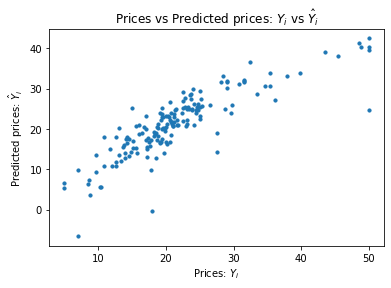

In [13]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [14]:
lr_ne.coef_

array([-1.28749718e-01,  3.78232228e-02,  5.82109233e-02,  3.23866812e+00,
       -1.61698120e+01,  3.90205116e+00, -1.28507825e-02, -1.42222430e+00,
        2.34853915e-01, -8.21331947e-03, -9.28722459e-01,  1.17695921e-02,
       -5.47566338e-01])

In [15]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

## Linear Regression with SGD

In [16]:
# linear_model 모듈 안에 SGDRegressor 사용
# Nomal Regression에 비해 여러가지 Hyper-parameter를 직접이용해야 한다는 차이점이 있다.
# loss = lost function, 기본 squared_loss사용
# penalty = 'l2'/l2노름
# alpha = 000001 / learning rate 크면 클수록 regralization이 많이 되어 학습데이량이 줄어듬
# tol = 멈추는 기준 / 굳이 설정 X
# shuffle = True / SGD이므로 True
# learning_rate = constant, optimal, invscaliing / 전략 종류 optimal 가장 많이사용
# eta0 = 0.0 1/ learning rate의미
# warm_start = weight의 초기값 지정
from sklearn.linear_model import SGDRegressor

# SGDRegressor 생성
lr_SGD = SGDRegressor()

In [17]:
# Data Sacle
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X)
X_scaled = std_scaler.transform(X)

### 스케일한 데이터를 사용하지 않은 경우

In [18]:
# X_scaled 대신 X사용
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [19]:
# fitting
lr_SGD.fit(X_train, y_train)

SGDRegressor()

In [20]:
y_hat = lr_SGD.predict(X_test)
y_true = y_test

In [21]:
# 학습데이터가 엄청 큼 -> 제대로 되지않았따는 의미
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
rmse = np.sqrt((((y_hat - y_true)**2).sum() / len(y_true)))
rmse, mse

(206456247506426.75, 4.262418213443495e+28)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

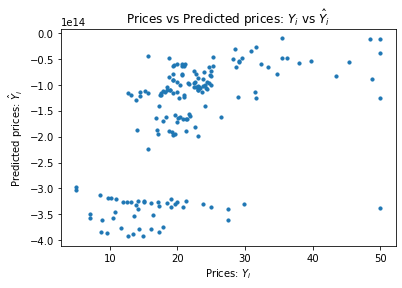

In [22]:
# 그래프가 잘 그려지지 않는다.
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

### 스케일한 데이터 사용하는 경우

In [24]:
# 기존 X 대신 X_scaled
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.33, random_state=42)

In [25]:
lr_SGD.fit(X_train, y_train)

SGDRegressor()

In [26]:
y_hat = lr_SGD.predict(X_test)
y_true = y_test

In [27]:
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
rmse = np.sqrt((((y_hat - y_true)**2).sum() / len(y_true)))
rmse, mse

(4.614359652226783, 21.29231500009848)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

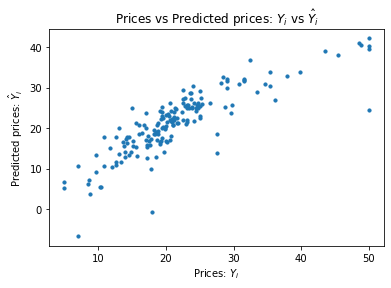

In [28]:
# 적절한 그래프가 나온다.
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

#### SBD를 할땐 반드시 스케일한 데이터를 사용한다. (스케일을 하지 않을 경우는 iteration(n_itr)을 크게 learning_rate(eta0)을 작게 하고 constant 방식 사용)

## Linear Regression with Ridge & Lasso regression

### Lasso
- Lasso의 역할 : 적절한 Weight, bias를 찾기위해 제약조건을 걸어줌
- MSE가 최소가 되게 하는 가중치와 편향을 찾는데 동시에 가중치들의 절대값들의 합, 즉 가중치의 절대값들이 최소(기울기가 작아지도록)가 되게 한다.
- 다시 말해서 Wieght의 모든 원소가 0이 되거나 0에 가깝게 되게 해야한다. 따라서 어떤 특성들은 모델을 만들때 사용되지 않는다.
- 어떤 벡터의 요소들의 절대값들의 합은 L1-norm이므로 라쏘는 간단히 말해서 L1-norm 패널티를 가진 선형 회귀 방법이다.  

#### 장점
1. 제약 조건을 통해 일반화된 모형을 찾는다는 것이다. 
2. 가중치들이 0이 되게 하여 그에 해당하는 특성들을 제외해준다. 결과적으로 모델에서 가장 중요한 특성이 무엇인지 알게되는 등 모델 해석력이 좋아진다.

### Ridge
- Lasso와 달리 L2-norm 패널티를 가진다.
- Lasso는 가중치들이 0이 되지만, Ridge의 가중치들은 0에 가까워질 뿐 0이 되지는 않는다.  

#### Ridge vs Lasso
- 특성이 많은데 그중 일부분만 중요하다면 Ridge가, 특성의 중요도가 전체적으로 비슷하다면 Ridge가 좀 더 괜찮은 모델을 찾아줄 것이다. 

In [37]:
from sklearn.linear_model import Lasso, Ridge


In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [39]:
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train,y_train)
#lasso = Lasso(fit_intercept=True, alpha=0.5)

Ridge(alpha=0.5)

In [32]:
y_hat = ridge.predict(X_test)
y_true = y_test
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
rmse = np.sqrt((((y_hat - y_true)**2).sum() / len(y_true)))
rmse, mse

(4.57905848479117, 20.967776607138006)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

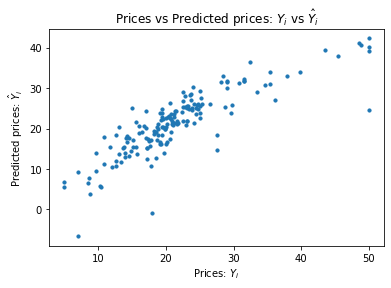

In [33]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [34]:
from sklearn.model_selection import KFold

print('Ridge Regression')
print('alpha\t RMSE_train\t RMSE_10cv\n')
alpha = np.linspace(.01,20,50)
t_rmse = np.array([])
cv_rmse = np.array([])

for a in alpha:
    ridge = Ridge(fit_intercept=True, alpha=a)
    
    # computing the RMSE on training data
    ridge.fit(X_train,y_train)
    p = ridge.predict(X_test)
    err = p-y_test
    total_error = np.dot(err,err)
    rmse_train = np.sqrt(total_error/len(p))

    # computing RMSE using 10-fold cross validation
    kf = KFold(10)
    xval_err = 0
    for train, test in kf.split(X):
        ridge.fit(X[train], y[train])
        p = ridge.predict(X[test])
        err = p - y[test]
        xval_err += np.dot(err,err)
    rmse_10cv = np.sqrt(xval_err/len(X))
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_10cv])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_10cv))

Ridge Regression
alpha	 RMSE_train	 RMSE_10cv

0.010	 4.5529		 5.8757
0.418	 4.5749		 5.8419
0.826	 4.5935		 5.8270
1.234	 4.6074		 5.8186
1.642	 4.6180		 5.8126
2.050	 4.6262		 5.8078
2.458	 4.6327		 5.8034
2.866	 4.6379		 5.7993
3.274	 4.6422		 5.7953
3.682	 4.6458		 5.7912
4.090	 4.6489		 5.7873
4.498	 4.6515		 5.7833
4.906	 4.6538		 5.7793
5.313	 4.6558		 5.7753
5.721	 4.6576		 5.7714
6.129	 4.6593		 5.7674
6.537	 4.6607		 5.7635
6.945	 4.6621		 5.7596
7.353	 4.6633		 5.7557
7.761	 4.6644		 5.7518
8.169	 4.6655		 5.7479
8.577	 4.6665		 5.7441
8.985	 4.6674		 5.7404
9.393	 4.6683		 5.7366
9.801	 4.6691		 5.7329
10.209	 4.6699		 5.7292
10.617	 4.6707		 5.7256
11.025	 4.6714		 5.7220
11.433	 4.6722		 5.7184
11.841	 4.6729		 5.7149
12.249	 4.6735		 5.7114
12.657	 4.6742		 5.7079
13.065	 4.6748		 5.7045
13.473	 4.6755		 5.7011
13.881	 4.6761		 5.6978
14.289	 4.6767		 5.6945
14.697	 4.6773		 5.6912
15.104	 4.6779		 5.6880
15.512	 4.6785		 5.6848
15.920	 4.6791		 5.6816
16.328	 4.6797		 5

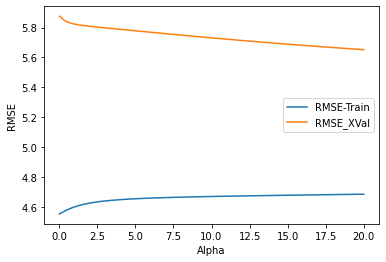

In [35]:
plt.plot(alpha, t_rmse, label='RMSE-Train')
plt.plot(alpha, cv_rmse, label='RMSE_XVal')
plt.legend( ('RMSE-Train', 'RMSE_XVal') )
plt.ylabel('RMSE')
plt.xlabel('Alpha')
plt.show()

In [36]:
a = 0.3
for name,met in [
        ('linear regression', LinearRegression()),
        ('lasso', Lasso(fit_intercept=True, alpha=a)),
        ('ridge', Ridge(fit_intercept=True, alpha=a)),
        ]:
    met.fit(X_train,y_train)
    # p = np.array([met.predict(xi) for xi in x])
    p = met.predict(X_test)
    e = p-y_test
    total_error = np.dot(e,e)
    rmse_train = np.sqrt(total_error/len(p))

    kf = KFold(10)
    err = 0
    for train,test in kf.split(X):
        met.fit(X[train],y[train])
        p = met.predict(X[test])
        e = p-y[test]
        err += np.dot(e,e)

    rmse_10cv = np.sqrt(err/len(X))
    print('Method: %s' %name)
    print('RMSE on training: %.4f' %rmse_train)
    print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: linear regression
RMSE on training: 4.5524
RMSE on 10-fold CV: 5.8770
Method: lasso
RMSE on training: 4.7242
RMSE on 10-fold CV: 5.7637
Method: ridge
RMSE on training: 4.5687
RMSE on 10-fold CV: 5.8487
